<a href="https://colab.research.google.com/github/Jana-ekram/AI-Project/blob/main/Copy_of_AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


***Importing the data set from Kaggle***

In [ ]:
from google.colab import files
import pandas as pd

data = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

# Show the data
data.head()


Saving ecommerce_customer_data_custom_ratios.csv to ecommerce_customer_data_custom_ratios.csv
Loading file: ecommerce_customer_data_custom_ratios.csv


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


Analysis of the chosen attributes.


Means:
 Product Price            0.499305
Quantity                 0.499724
Total Purchase Amount    0.500071
Customer Age             0.498856
dtype: float64

Medians:
 Product Price            0.50000
Quantity                 0.50000
Total Purchase Amount    0.49981
Customer Age             0.50000
dtype: float64

Standard Deviation for Numerical Attributes:
 Product Price            0.288915
Quantity                 0.353673
Total Purchase Amount    0.274844
Customer Age             0.295197
dtype: float64

Modes for All Attributes:
Product Category: Clothing
Product Price: 0.1836734693877551
Quantity: 0.0
Total Purchase Amount: 0.5116190476190476
Payment Method: Credit Card
Customer Age: 0.7692307692307693
Returns: 0.0
Gender: Female

Entropy Values for All Relevant Attributes:
Product Category: 1.3662146996291606
Product Price: 4.141864054395153
Quantity: 1.6094366601310373
Total Purchase Amount: 4.18135105788009
Payment Method: 1.278159806081102
Customer Age: 3.9697238822818317


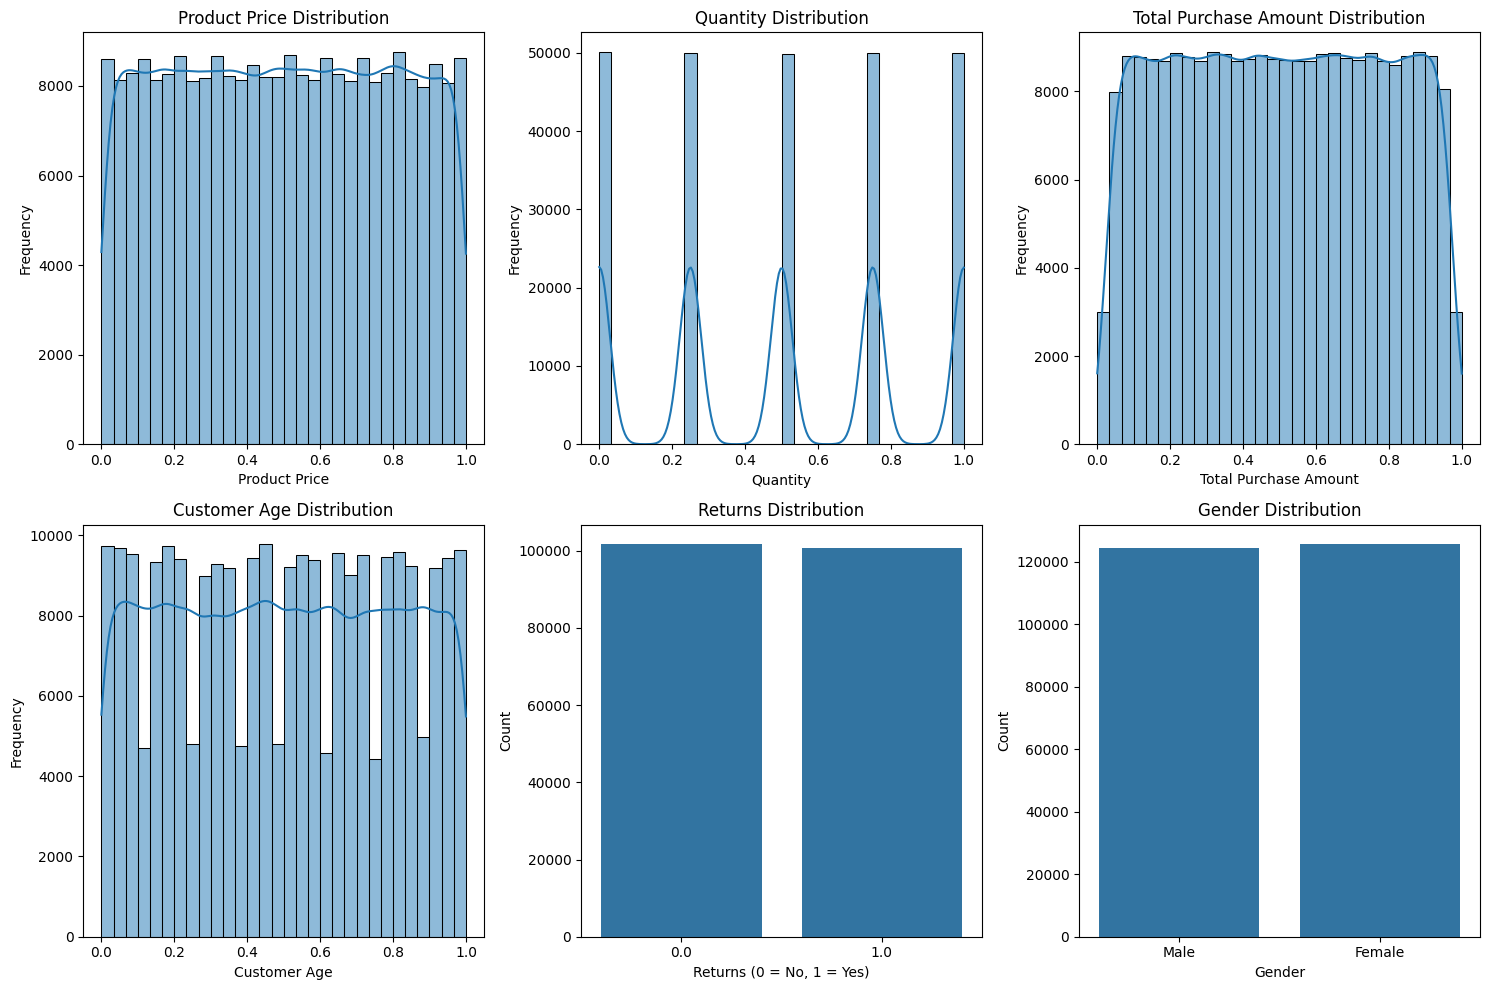


Correlation Values for Numerical Attributes:
                       Product Price  Quantity  Total Purchase Amount  \
Product Price               1.000000 -0.000308              -0.002336   
Quantity                   -0.000308  1.000000              -0.000096   
Total Purchase Amount      -0.002336 -0.000096               1.000000   
Customer Age               -0.003860  0.000041               0.051847   

                       Customer Age  
Product Price             -0.003860  
Quantity                   0.000041  
Total Purchase Amount      0.051847  
Customer Age               1.000000  


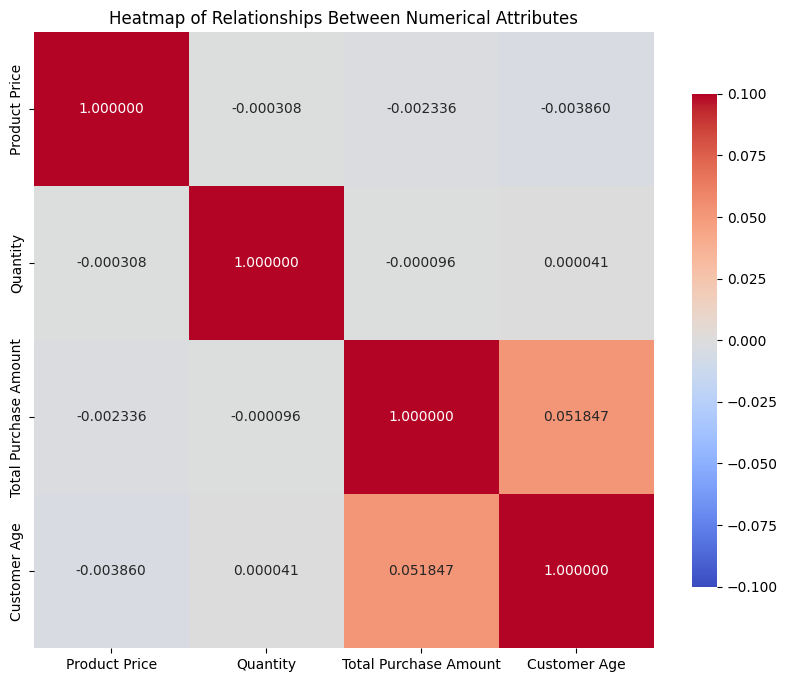

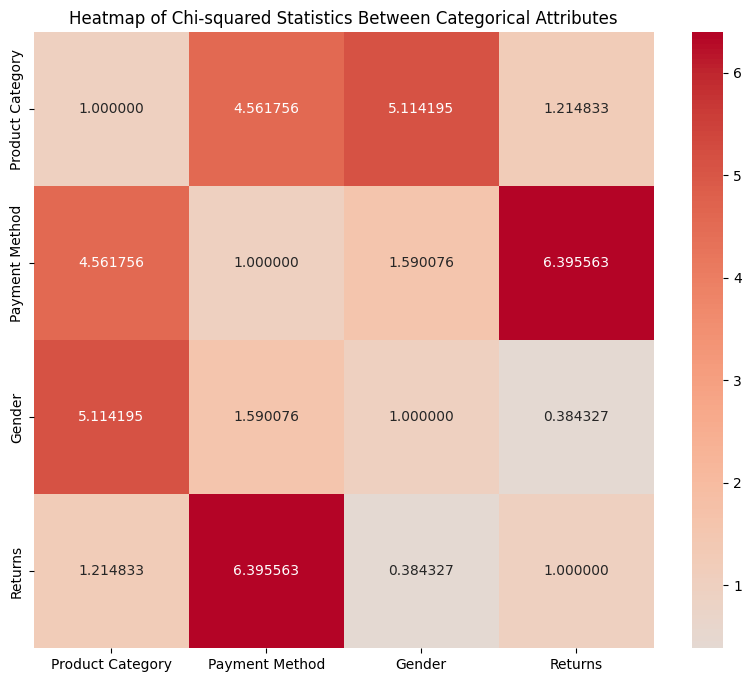

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


# Convert Purchase Date to datetime
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

# Define relevant attributes
relevant_attributes = ['Product Category', 'Product Price',
                      'Quantity', 'Total Purchase Amount', 'Payment Method',
                      'Customer Age', 'Returns', 'Gender']

# Summary statistics for numerical attributes
numerical_attributes = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

# Calculate mean, median, mode, and standard deviation for numerical attributes
means = data[numerical_attributes].mean()
medians = data[numerical_attributes].median()
std_dev = data[numerical_attributes].std()

# Display the statistics
print("\nMeans:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviation for Numerical Attributes:\n", std_dev)

# Calculate mode for all relevant attributes, including categorical ones
modes = {}
for column in relevant_attributes:
    modes[column] = data[column].mode().iloc[0]  # Get the first mode for all attributes

print("\nModes for All Attributes:")
for key, value in modes.items():
    print(f"{key}: {value}")

# Calculate entropy for all relevant columns (excluding Purchase Date)
def calculate_entropy(column):
    if column.dtype == 'object' or column.nunique() < 10:  # Categorical
        distribution = column.value_counts(normalize=True)
        return entropy(distribution)
    elif np.issubdtype(column.dtype, np.number):  # Numerical, bin into categories
        bins = np.histogram_bin_edges(column, bins='auto')
        binned_counts = np.histogram(column, bins=bins)[0]
        distribution = binned_counts / binned_counts.sum()
        return entropy(distribution)

# Entropy calculations for relevant attributes
entropies = {col: calculate_entropy(data[col]) for col in relevant_attributes}
print("\nEntropy Values for All Relevant Attributes:")
for key, value in entropies.items():
    print(f"{key}: {value}")

scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical attributes
data[numerical_attributes] = scaler.fit_transform(data[numerical_attributes])

# Visualize distributions
plt.figure(figsize=(15, 10))

# Product Price
plt.subplot(2, 3, 1)
sns.histplot(data['Product Price'], bins=30, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Product Price')
plt.ylabel('Frequency')

# Quantity
plt.subplot(2, 3, 2)
sns.histplot(data['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Total Purchase Amount
plt.subplot(2, 3, 3)
sns.histplot(data['Total Purchase Amount'], bins=30, kde=True)
plt.title('Total Purchase Amount Distribution')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')

# Customer Age
plt.subplot(2, 3, 4)
sns.histplot(data['Customer Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')

# Returns
plt.subplot(2, 3, 5)
sns.countplot(x='Returns', data=data)
plt.title('Returns Distribution')
plt.xlabel('Returns (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Gender
plt.subplot(2, 3, 6)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

categorical_attributes = ['Product Category', 'Payment Method', 'Gender', 'Returns']

# Compute the correlation matrix for numerical attributes
numerical_corr = data[numerical_attributes].corr()
# Print the correlation values for numerical attributes
print("\nCorrelation Values for Numerical Attributes:")
print(numerical_corr)

# Create a DataFrame to hold Chi-squared values for categorical attributes
chi2_matrix = pd.DataFrame(index=categorical_attributes, columns=categorical_attributes)

# Compute Chi-squared values for each pair of categorical attributes
for i in categorical_attributes:
    for j in categorical_attributes:
        if i == j:
            chi2_matrix.loc[i, j] = 1.0  # Self correlation
        else:
            # Perform Chi-squared test
            contingency_table = pd.crosstab(data[i], data[j])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[i, j] = chi2  # Store the Chi-squared statistic



# Plot the heatmap for numerical correlations with a softer color gradient
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr, annot=True, fmt=".6f", cmap='coolwarm', center=0,
            vmin=-0.1, vmax=0.1, cbar_kws={"shrink": .8})  # Use a soft blue color map
plt.title('Heatmap of Relationships Between Numerical Attributes')
plt.show()



# Step 2: Heatmap for Categorical Attributes (Chi-squared)
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix.astype(float), annot=True, fmt=".6f", cmap='coolwarm', center=0)
plt.title('Heatmap of Chi-squared Statistics Between Categorical Attributes')
plt.show()


Analysis for the attribute to
be considered at the output to be predicted.


Mode for Churn: 0

Counts for Churn (0 and 1):
 Churn
0    200126
1     49874
Name: count, dtype: int64


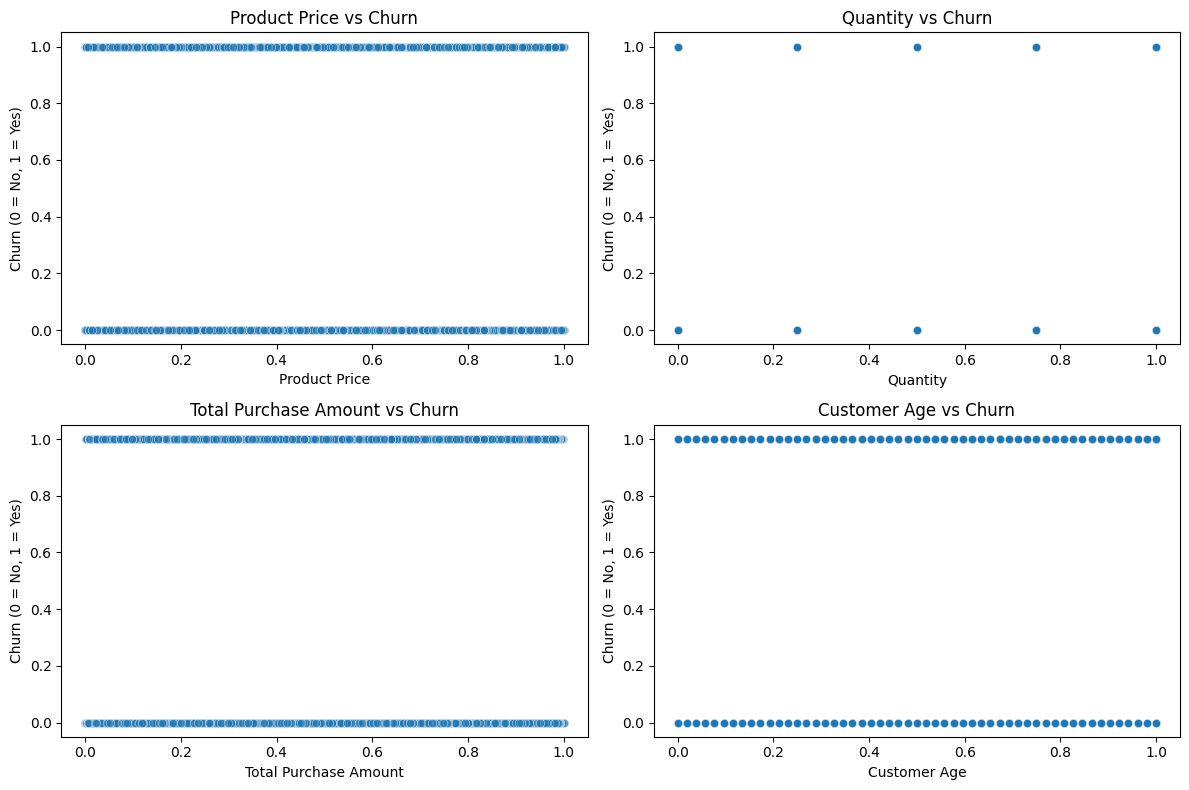

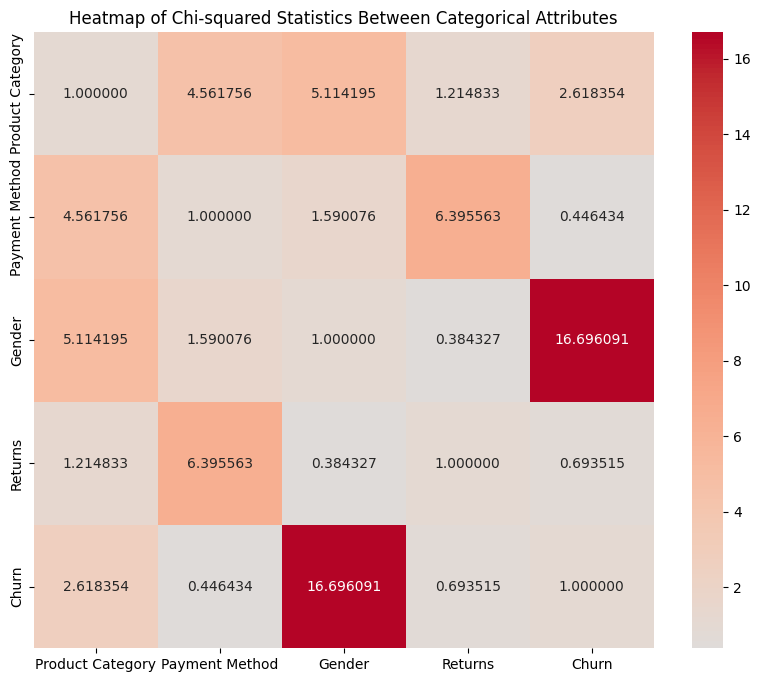


Correlation Values with Churn:
Product Price           -0.001666
Quantity                -0.002674
Total Purchase Amount    0.000770
Customer Age            -0.006015
Churn                    1.000000
Name: Churn, dtype: float64


In [ ]:

# Calculate mode and counts of 0 and 1 for churn
mode_churn = data['Churn'].mode()[0]  # Get the first mode for churn
# Count occurrences of each value (0 and 1)
counts_churn = data['Churn'].value_counts()

print("\nMode for Churn:", mode_churn)
print("\nCounts for Churn (0 and 1):\n", counts_churn)

# Scatter plots for numerical attributes against churn
plt.figure(figsize=(12, 8))
for i, attribute in enumerate(numerical_attributes):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=data[attribute], y=data['Churn'], alpha=0.6)
    plt.title(f'{attribute} vs Churn')
    plt.xlabel(attribute)
    plt.ylabel('Churn (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


categorical_attributes = ['Product Category', 'Payment Method', 'Gender', 'Returns', 'Churn']

# Create a DataFrame to hold Chi-squared values for categorical attributes
chi2_matrix = pd.DataFrame(index=categorical_attributes, columns=categorical_attributes)

# Compute Chi-squared values for each pair of categorical attributes
for i in categorical_attributes:
    for j in categorical_attributes:
        if i == j:
            chi2_matrix.loc[i, j] = 1.0  # Self correlation
        else:
            # Perform Chi-squared test
            contingency_table = pd.crosstab(data[i], data[j])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_matrix.loc[i, j] = chi2  # Store the Chi-squared statistic

# Plot the heatmap for Chi-squared statistics
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix.astype(float), annot=True, fmt=".6f", cmap='coolwarm', center=0)
plt.title('Heatmap of Chi-squared Statistics Between Categorical Attributes')
plt.show()

# Calculate the correlation matrix for numerical attributes
numerical_corr = data[numerical_attributes + ['Churn']].corr()

# Print the correlation values for churn
print("\nCorrelation Values with Churn:")
print(numerical_corr['Churn'])

In [ ]:
import pandas as pd

def check_data_cleanliness(data):
    # Check for missing values
    if data.isnull().values.any():
        print("Data contains missing values.\n")
        print("Summary of missing values per column:")
        print(data.isnull().sum())
    else:
        print("No missing values found in the data.")

    # Check for duplicate rows
    duplicates = data.duplicated().sum()
    if duplicates > 0:
        print(f"\nData contains {duplicates} duplicate rows.")
    else:
        print("\nNo duplicate rows found.")

    # Check for any unexpected data types
    print("\nData types of each column:")
    print(data.dtypes)


# Replace missing values in the 'Returns' column with the string "missing values"
data['Returns'] = data['Returns'].fillna("missing values")

# Verify that there are no more missing values in the 'Returns' column
print(data['Returns'].isnull().sum())
print("\nUpdated Data Preview:")
missing_values_rows = data[data['Returns'] == "missing values"]
print(missing_values_rows)

# Example usage:
# Assuming your data is already loaded into a DataFrame called 'data'
check_data_cleanliness(data)


0

Updated Data Preview:
        Customer ID        Purchase Date Product Category  Product Price  \
14            28805  2020-07-02 02:54:37         Clothing            368   
15            28961  2021-04-25 23:55:21            Books             30   
20            12163  2021-12-18 17:49:18         Clothing            255   
21            12163  2020-06-20 05:56:17            Books            227   
23            12163  2023-07-01 12:36:00            Books             60   
...             ...                  ...              ...            ...   
249985         9093  2021-05-01 10:11:28         Clothing            111   
249988        23536  2021-09-17 02:50:11      Electronics             87   
249990         5977  2021-08-05 21:36:18            Books             44   
249992        45397  2022-02-18 04:18:18            Books             95   
249993        35965  2022-10-13 19:48:58             Home             83   

        Quantity  Total Purchase Amount Payment Method  Custom

In [ ]:
!pip install hmmlearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from hmmlearn import hmm
import pandas as pd



# Convert categorical columns to numeric codes
data['Product Category Code'] = data['Product Category'].astype('category').cat.codes
data['Payment Method Code'] = data['Payment Method'].astype('category').cat.codes
data['Gender Code'] = data['Gender'].astype('category').cat.codes

# Define hidden states and observed states
# Including Product Price and Quantity as hidden states
hidden_states = data[['Product Category Code', 'Product Price', 'Quantity',
                      'Total Purchase Amount', 'Payment Method Code',
                      'Customer Age', 'Returns', 'Gender Code']].values

observed_states = data['Churn'].values  # Churn is your observed state

# Initial State Probabilities
initial_state_counts = data['Product Category'].value_counts(normalize=True)
initial_state_probabilities = initial_state_counts.values
print("Initial State Probabilities:", initial_state_probabilities)

# Number of unique hidden states
n_states = len(data['Product Category Code'].unique())
transition_counts = np.zeros((n_states, n_states))

# Calculate transition counts based on hidden states
states = data['Product Category Code'].values  # Use numeric codes for states
for i in range(len(states) - 1):
    transition_counts[states[i], states[i + 1]] += 1

# Normalize to get transition probabilities
transition_probabilities = transition_counts / transition_counts.sum(axis=1, keepdims=True)
print("\nTransition Probabilities:\n", transition_probabilities)

# Emission Probabilities
n_observed_states = len(np.unique(observed_states))
emission_counts = np.zeros((n_states, n_observed_states))

for i in range(len(states)):
    emission_counts[states[i], observed_states[i]] += 1

# Normalize to get emission probabilities
emission_probabilities = emission_counts / emission_counts.sum(axis=1, keepdims=True)
print("\nEmission Probabilities:\n", emission_probabilities)

# Create the HMM model with 2 hidden states (adjust n_components as needed)
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=100)

# Drop rows with NaN values to avoid fitting errors
data.dropna(subset=['Product Category Code', 'Product Price', 'Quantity',
                    'Total Purchase Amount', 'Payment Method Code',
                    'Customer Age', 'Returns', 'Gender Code'], inplace=True)

# Recreate hidden states after handling NaN values
hidden_states = data[['Product Category Code', 'Product Price', 'Quantity',
                      'Total Purchase Amount', 'Payment Method Code',
                      'Customer Age', 'Returns', 'Gender Code']].values

# Fit the model on hidden states
model.fit(hidden_states)  # Fit the model to hidden states

# Predict hidden states based on the fitted model
hidden_state_predictions = model.predict(hidden_states)

# Print the most likely sequence of hidden states over time
print("Predicted Hidden States:")
print(hidden_state_predictions)

# Calculate the log probability of the observed sequence and convert to probability
probability_of_churn = np.exp(model.score(hidden_states))

print("\nEstimated Probability of Churn based on Hidden States Sequence:", probability_of_churn)


Initial State Probabilities: [0.30003854 0.29937649 0.20087054 0.19971443]

Transition Probabilities:
 [[0.29886954 0.30106444 0.20041258 0.19965344]
 [0.3009106  0.29928041 0.20079369 0.1990153 ]
 [0.29744687 0.29747147 0.20314345 0.20193821]
 [0.29977983 0.30222893 0.1993667  0.19862455]]

Emission Probabilities:
 [[0.80148527 0.19851473]
 [0.80134697 0.19865303]
 [0.80067393 0.19932607]
 [0.79796156 0.20203844]]
Predicted Hidden States:
[1 0 0 ... 1 0 1]

Estimated Probability of Churn based on Hidden States Sequence: 0.0
